
# FIFA 19 complete player dataset

Target: A handful of statistics about the FIFA 19.

Source: https://www.kaggle.com/karangadiya/fifa19

As I mentioned in my bio, I was a football player, but I have been injured, so I had to forget about my football career. Now work on ML connected with sport's dataset gave me a lot of fun :-)

![fifa_12.jpeg](image/fifa_12.jpeg)

In [1]:
# Data manipulation
import numpy as np
import pandas as pd

# Data visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Display propertice
pd.set_option('display.max_columns', 100)
pd.set_option('display.max_rows', 100)

# Date
import datetime

# Maps
import geopandas as gpd
import pycountry

from math import pi

# Display in Jupyter
from IPython.display import display, HTML

In [2]:
# Load dataset
df_fifa19 = pd.read_csv('input/data.csv')

### Info about data

In [3]:
# Show the first five rows
df_fifa19.head()

,Unnamed: 0,ID,Name,Age,Photo,Nationality,Flag,Overall,Potential,Club,Club Logo,Value,Wage,Special,Acceleration,Aggression,Agility,Balance,BallControl,Body Type,CAM,CB,CDM,CF,CM,Composure,Contract Valid Until,Crossing,Curve,Dribbling,FKAccuracy,Finishing,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes,HeadingAccuracy,Interceptions,International Reputation,Jersey Number,Joined,Jumping,LAM,LB,LCB,LCM,LDM,LF,LM,LS,LW,LWB,Loaned From,LongPassing,LongShots,Marking,Penalties,Position,Positioning,Preferred Foot,RAM,RB,RCB,RCM,RDM,RF,RM,RS,RW,RWB,Reactions,Real Face,Release Clause,ST,ShortPassing,ShotPower,Skill Moves,SlidingTackle,SprintSpeed,Stamina,StandingTackle,Strength,Vision,Volleys,Weak Foot,Work Rate
0,0,158023,L. Messi,31,https://cdn.sofifa.org/players/4/19/158023.png,Argentina,https://cdn.sofifa.org/flags/52.png,94,94,FC Barcelona,https://cdn.sofifa.org/teams/2/light/241.png,€110.5M,€565K,2195,91,48,91,95,96,Messi,93+2,47+2,61+2,93+2,84+2,96,2021,77,93,97,94,95,6,11,15,14,8,70,22,5.0,10.0,"Jul 1, 2004",68,93+2,58+2,47+2,84+2,61+2,93+2,90+2,88+2,92+2,63+2,NaN,87,94,33,75,RW,94,Left,93+2,58+2,47+2,84+2,61+2,93+2,90+2,88+2,92+2,63+2,95,Yes,€226.5M,88+2,90,85,4,26,86,72,28,59,94,86,4,Medium/ Medium
1,1,20801,Cristiano Ronaldo,33,https://cdn.sofifa.org/players/4/19/20801.png,Portugal,https://cdn.sofifa.org/flags/38.png,94,94,Juventus,https://cdn.sofifa.org/teams/2/light/45.png,€77M,€405K,2228,89,63,87,70,94,C. Ronaldo,88+3,53+3,61+3,90+3,81+3,95,2022,84,81,88,76,94,7,11,15,14,11,89,29,5.0,7.0,"Jul 10, 2018",95,88+3,61+3,53+3,81+3,61+3,90+3,88+3,91+3,89+3,65+3,NaN,77,93,28,85,LW,95,Right,88+3,61+3,53+3,81+3,61+3,90+3,88+3,91+3,89+3,65+3,96,Yes,€127.1M,91+3,81,95,5,23,91,88,31,79,82,87,4,High/ Low
2,2,190871,Neymar Jr,26,https://cdn.sofifa.org/players/4/19/190871.png,Brazil,https://cdn.sofifa.org/flags/54.png,92,93,Paris Saint-Germain,https://cdn.sofifa.org/teams/2/light/73.png,€118.5M,€290K,2143,94,56,96,84,95,Neymar,89+3,47+3,60+3,89+3,81+3,94,2022,79,88,96,87,87,9,9,15,15,11,62,36,5.0,10.0,"Aug 3, 2017",61,89+3,60+3,47+3,81+3,60+3,89+3,88+3,84+3,89+3,65+3,NaN,78,82,27,81,CAM,89,Right,89+3,60+3,47+3,81+3,60+3,89+3,88+3,84+3,89+3,65+3,94,Yes,€228.1M,84+3,84,80,5,33,90,81,24,49,87,84,5,High/ Medium
3,3,193080,De Gea,27,https://cdn.sofifa.org/players/4/19/193080.png,Spain,https://cdn.sofifa.org/flags/45.png,91,93,Manchester United,https://cdn.sofifa.org/teams/2/light/11.png,€72M,€260K,1471,57,38,60,43,42,Lean,NaN,NaN,NaN,NaN,NaN,68,2019,17,21,18,19,13,90,85,87,88,94,21,30,4.0,1.0,"Jul 1, 2011",67,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,51,12,15,40,GK,12,Right,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,90,Yes,€138.6M,NaN,50,31,1,13,58,43,21,64,68,13,3,Medium/ Medium
4,4,192985,K. De Bruyne,27,https://cdn.sofifa.org/players/4/19/192985.png,Belgium,https://cdn.sofifa.org/flags/7.png,91,92,Manchester City,https://cdn.sofifa.org/teams/2/light/10.png,€102M,€355K,2281,78,76,79,77,91,Normal,88+3,66+3,77+3,87+3,87+3,88,2023,93,85,86,83,82,15,13,5,10,13,55,61,4.0,17.0,"Aug 30, 2015",63,88+3,73+3,66+3,87+3,77+3,87+3,88+3,82+3,87+3,77+3,NaN,91,91,68,79,RCM,87,Right,88+3,73+3,66+3,87+3,77+3,87+3,88+3,82+3,87+3,77+3,91,Yes,€196.4M,82+3,92,91,4,51,76,90,58,75,94,82,5,High/ High


We have some unnecessary columns. I will delete it below.

In [4]:
# Show the info about dataset
df_fifa19.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17790 entries, 0 to 17789
Data columns (total 87 columns):
Unnamed: 0                  17790 non-null int64
ID                          17790 non-null int64
Name                        17790 non-null object
Age                         17790 non-null int64
Photo                       17790 non-null object
Nationality                 17790 non-null object
Flag                        17790 non-null object
Overall                     17790 non-null int64
Potential                   17790 non-null int64
Club                        17557 non-null object
Club Logo                   17790 non-null object
Value                       17790 non-null object
Wage                        17790 non-null object
Special                     17790 non-null int64
Acceleration                17790 non-null int64
Aggression                  17790 non-null int64
Agility                     17790 non-null int64
Balance                     17790 non-null int64
B

We have 11.8 MB dataset. It include three kind of typ features: float, int and object. We also see that in dataset occurs NaN value.

In [5]:
# Show some statistics about dataset
df_fifa19.describe()

,Unnamed: 0,ID,Age,Overall,Potential,Special,Acceleration,Aggression,Agility,Balance,BallControl,Composure,Crossing,Curve,Dribbling,FKAccuracy,Finishing,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes,HeadingAccuracy,Interceptions,International Reputation,Jersey Number,Jumping,LongPassing,LongShots,Marking,Penalties,Positioning,Reactions,ShortPassing,ShotPower,Skill Moves,SlidingTackle,SprintSpeed,Stamina,StandingTackle,Strength,Vision,Volleys,Weak Foot
count,17790.000000,17790.000000,17790.000000,17790.000000,17790.000000,17790.000000,17790.000000,17790.000000,17790.000000,17790.000000,17790.000000,17790.000000,17790.000000,17790.000000,17790.000000,17790.000000,17790.000000,17790.000000,17790.000000,17790.000000,17790.000000,17790.000000,17790.000000,17790.000000,15811.000000,15800.000000,17790.000000,17790.000000,17790.000000,17790.000000,17790.000000,17790.000000,17790.000000,17790.000000,17790.000000,17790.000000,17790.000000,17790.000000,17790.000000,17790.000000,17790.00000,17790.000000,17790.000000,17790.000000
mean,9098.328162,213559.964193,25.277628,66.522597,71.447611,1603.820967,64.565037,55.693255,63.474030,63.929005,58.277459,58.541765,49.651883,47.089039,55.284711,42.826757,45.482687,16.611074,16.387015,16.230860,16.377234,16.705396,52.198876,46.536313,1.113402,19.542722,65.034345,52.593536,47.019224,47.164531,48.512591,49.878021,61.733783,58.591006,55.378977,2.346824,45.527600,64.659865,63.120180,47.540585,65.26054,53.306802,42.865318,2.944744
std,5226.015053,30096.437141,4.616679,6.594204,6.053951,267.995952,14.939258,17.345995,14.770205,14.157723,16.641401,11.357226,18.335054,18.348527,18.869260,17.445868,19.494042,17.677033,16.892784,16.490004,17.013133,17.933474,17.341628,20.696390,0.396033,15.748440,11.843462,15.324195,19.223742,19.868291,15.674479,19.475337,9.001531,14.678851,17.194020,0.748867,21.273696,14.682636,15.910172,21.656064,12.58181,14.108885,17.634472,0.660417
min,0.000000,16.000000,16.000000,52.000000,52.000000,752.000000,12.000000,11.000000,14.000000,16.000000,5.000000,3.000000,5.000000,6.000000,4.000000,3.000000,2.000000,1.000000,1.000000,1.000000,1.000000,1.000000,4.000000,3.000000,1.000000,1.000000,15.000000,8.000000,3.000000,3.000000,5.000000,2.000000,30.000000,7.000000,2.000000,1.000000,3.000000,12.000000,12.000000,2.000000,17.00000,10.000000,4.000000,1.000000
25%,4580.250000,199744.250000,22.000000,62.000000,67.000000,1470.000000,57.000000,44.000000,55.000000,56.000000,54.000000,51.000000,38.000000,34.000000,49.000000,31.000000,30.000000,8.000000,8.000000,8.000000,8.000000,8.000000,44.000000,26.000000,1.000000,9.000000,58.000000,43.000000,33.000000,30.000000,39.000000,38.000000,56.000000,53.000000,45.000000,2.000000,24.000000,57.000000,56.000000,26.000000,58.00000,44.000000,30.000000,3.000000
50%,9101.500000,220946.000000,25.000000,66.000000,71.000000,1640.000000,67.000000,58.000000,66.000000,66.000000,63.000000,59.000000,54.000000,48.000000,61.000000,41.000000,49.000000,11.000000,11.000000,11.000000,11.000000,11.000000,55.000000,52.000000,1.000000,17.000000,66.000000,56.000000,51.000000,52.000000,49.000000,55.000000,62.000000,62.000000,59.000000,2.000000,52.000000,67.000000,66.000000,55.000000,66.00000,55.000000,44.000000,3.000000
75%,13622.750000,235633.750000,29.000000,71.000000,75.000000,1788.000000,75.000000,69.000000,74.000000,74.000000,69.000000,66.000000,64.000000,62.000000,68.000000,56.000000,62.000000,14.000000,14.000000,14.000000,14.000000,14.000000,64.000000,64.000000,1.000000,26.000000,73.000000,64.000000,62.000000,64.000000,60.000000,64.000000,68.000000,68.000000,68.000000,3.000000,64.000000,75.000000,74.000000,66.000000,74.00000,64.000000,57.000000,3.000000
max,18144.000000,246264.000000,45.000000,94.000000,95.000000,2346.000000,97.000000,95.000000,96.000000,96.000000,96.000000,96.000000,93.000000,94.000000,97.000000,94.000000,95.000000,91.000000,92.000000,91.000000,90.000000,94.000000,94.000000,92.000000,5.000000,99.000000,95.000000,93.000000,94.000000,94.000000,9

In [6]:
# Shape of dataset (it has 17790 row and 87 columns)
df_fifa19.shape

(17790, 87)

In [7]:
# Number of unique elements in dataset
df_fifa19.nunique()

Unnamed: 0                  17790
ID                          17790
Name                        16823
Age                            28
Photo                       17790
Nationality                   164
Flag                          164
Overall                        42
Potential                      44
Club                          651
Club Logo                     679
Value                         213
Wage                          143
Special                      1392
Acceleration                   86
Aggression                     85
Agility                        81
Balance                        81
BallControl                    90
Body Type                      10
CAM                           102
CB                            108
CDM                            98
CF                            103
CM                             91
Composure                      84
Contract Valid Until           37
Crossing                       89
Curve                          89
Dribbling     

In [49]:
# I check where there are NaN values
df_fifa19.isnull().any()

Unnamed: 0                  False
ID                          False
Name                        False
Age                         False
Photo                       False
Nationality                 False
Flag                        False
Overall                     False
Potential                   False
Club                         True
Club Logo                   False
Value                       False
Wage                        False
Special                     False
Acceleration                False
Aggression                  False
Agility                     False
Balance                     False
BallControl                 False
Body Type                   False
CAM                          True
CB                           True
CDM                          True
CF                           True
CM                           True
Composure                   False
Contract Valid Until         True
Crossing                    False
Curve                       False
Dribbling     

In [9]:
# What columns are in dataset?
df_fifa19.columns

Index(['Unnamed: 0', 'ID', 'Name', 'Age', 'Photo', 'Nationality', 'Flag',
       'Overall', 'Potential', 'Club', 'Club Logo', 'Value', 'Wage', 'Special',
       'Acceleration', 'Aggression', 'Agility', 'Balance', 'BallControl',
       'Body Type', 'CAM', 'CB', 'CDM', 'CF', 'CM', 'Composure',
       'Contract Valid Until', 'Crossing', 'Curve', 'Dribbling', 'FKAccuracy',
       'Finishing', 'GKDiving', 'GKHandling', 'GKKicking', 'GKPositioning',
       'GKReflexes', 'HeadingAccuracy', 'Interceptions',
       'International Reputation', 'Jersey Number', 'Joined', 'Jumping', 'LAM',
       'LB', 'LCB', 'LCM', 'LDM', 'LF', 'LM', 'LS', 'LW', 'LWB', 'Loaned From',
       'LongPassing', 'LongShots', 'Marking', 'Penalties', 'Position',
       'Positioning', 'Preferred Foot', 'RAM', 'RB', 'RCB', 'RCM', 'RDM', 'RF',
       'RM', 'RS', 'RW', 'RWB', 'Reactions', 'Real Face', 'Release Clause',
       'ST', 'ShortPassing', 'ShotPower', 'Skill Moves', 'SlidingTackle',
       'SprintSpeed', 'Stamina', '

In [10]:
# I choose interesting to me columns. Later I will use them for analysis.
chosen_columns = [
    'Name',
    'Age',
    'Nationality',
    'Overall',
    'Potential',
    'Special',
    'Acceleration',
    'Aggression',
    'Agility',
    'Balance',
    'BallControl',
    'Body Type',
    'Composure',
    'Crossing',
    'Curve',
    'Club',
    'Dribbling',
    'FKAccuracy',
    'Finishing',
    'GKDiving',
    'GKHandling',
    'GKKicking',
    'GKPositioning',
    'GKReflexes',
    'HeadingAccuracy',
    'Interceptions',
    'International Reputation',
    'Jersey Number',
    'Jumping',
    'Joined',
    'LongPassing',
    'LongShots',
    'Marking',
    'Penalties',
    'Position',
    'Positioning',
    'Preferred Foot',
    'Reactions',
    'ShortPassing',
    'ShotPower',
    'Skill Moves',
    'SlidingTackle',
    'SprintSpeed',
    'Stamina',
    'StandingTackle',
    'Strength',
    'Value',
    'Vision',
    'Volleys',
    'Wage',
    'Weak Foot',
    'Work Rate'
]

In [11]:
# I create DataFrame with chosen columns
df = pd.DataFrame(df_fifa19, columns = chosen_columns)

In [12]:
# The five random rows
df.sample(5)

,Name,Age,Nationality,Overall,Potential,Special,Acceleration,Aggression,Agility,Balance,BallControl,Body Type,Composure,Crossing,Curve,Club,Dribbling,FKAccuracy,Finishing,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes,HeadingAccuracy,Interceptions,International Reputation,Jersey Number,Jumping,Joined,LongPassing,LongShots,Marking,Penalties,Position,Positioning,Preferred Foot,Reactions,ShortPassing,ShotPower,Skill Moves,SlidingTackle,SprintSpeed,Stamina,StandingTackle,Strength,Value,Vision,Volleys,Wage,Weak Foot,Work Rate
13925,G. Postma,20,Netherlands,61,68,1577,53,58,53,51,65,Lean,48,53,44,FC Groningen,57,42,32,9,11,11,6,15,62,59,1.0,20.0,54,NaN,66,49,54,40,CM,48,Right,58,67,57,2,53,55,65,56,74,€300K,52,38,€1K,3,Medium/ Medium
9035,Juan Cámara,24,Spain,66,72,1805,69,68,62,65,63,Normal,52,58,42,Miedź Legnica,60,28,28,15,9,12,13,7,65,60,1.0,2.0,71,"Dec 8, 2017",60,37,67,49,RB,47,Right,55,63,46,2,71,74,64,67,64,€875K,48,34,€1K,3,Medium/ High
2163,D. Falcinelli,27,Italy,74,75,1634,78,68,78,80,76,Normal,63,76,64,Bologna,73,66,32,7,10,8,7,7,48,75,1.0,2.0,62,"Jul 1, 2017",64,58,69,42,RB,70,Right,74,75,66,3,69,77,76,71,65,€6.5M,50,28,€29K,3,Medium/ Medium
10632,L. Miracoli,26,Italy,65,68,1461,58,61,65,50,50,Normal,54,61,29,Brescia,47,29,24,13,15,9,15,11,69,58,1.0,5.0,83,"Jul 1, 2017",53,34,63,31,CB,30,Right,61,58,47,2,65,59,84,64,70,€675K,50,26,€2K,3,Medium/ Medium
3795,N. Höfler,28,Germany,72,72,1802,58,77,69,65,68,Lean,69,47,42,SC Freiburg,63,32,52,14,15,8,14,14,59,70,1.0,20.0,61,"Jan 24, 2017",70,59,70,46,LDM,46,Left,68,68,60,3,69,60,73,72,62,€2.5M,69,34,€17K,3,Medium/ High


### Analysis!

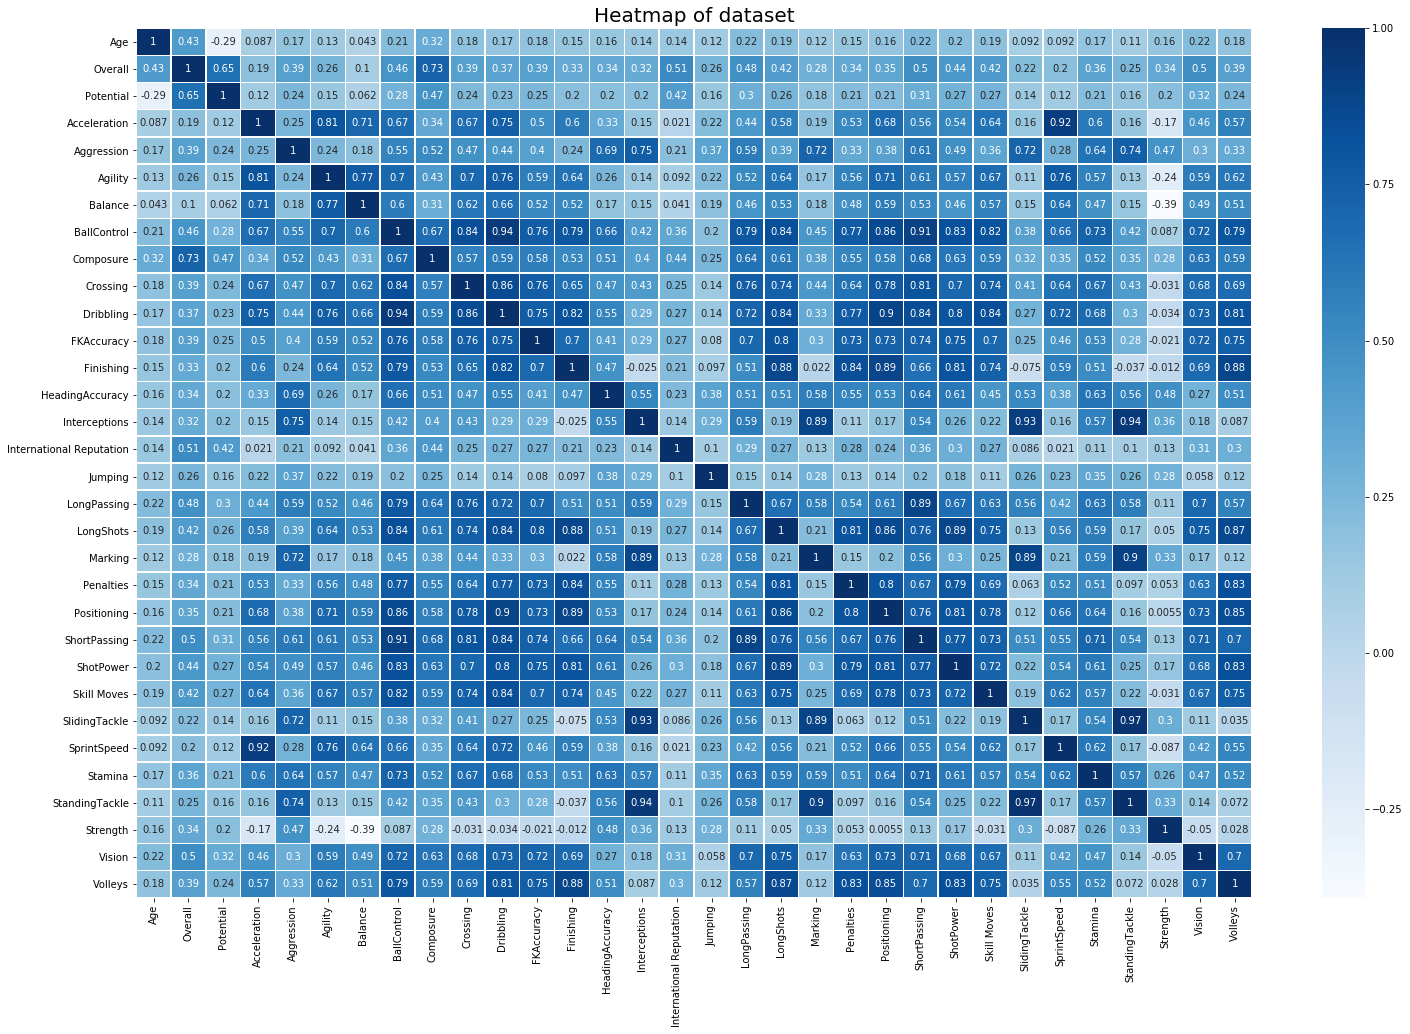

In [13]:
# Correlation heatmap
plt.rcParams['figure.figsize']=(25,16)
hm=sns.heatmap(df[['Age', 'Overall', 'Potential', 'Value', 'Wage',
                'Acceleration', 'Aggression', 'Agility', 'Balance', 'BallControl', 
                'Body Type','Composure', 'Crossing','Dribbling', 'FKAccuracy', 'Finishing', 
                'HeadingAccuracy', 'Interceptions','International Reputation',
                'Joined', 'Jumping', 'LongPassing', 'LongShots',
                'Marking', 'Penalties', 'Position', 'Positioning',
                'ShortPassing', 'ShotPower', 'Skill Moves', 'SlidingTackle',
                'SprintSpeed', 'Stamina', 'StandingTackle', 'Strength', 'Vision',
                'Volleys']].corr(), annot = True, linewidths=.5, cmap='Blues')
hm.set_title(label='Heatmap of dataset', fontsize=20)
hm;

We see some interesting correlations. I assume that "interesting" is greater than 0.7. 

For example: 
- correlation between Acceleration and other

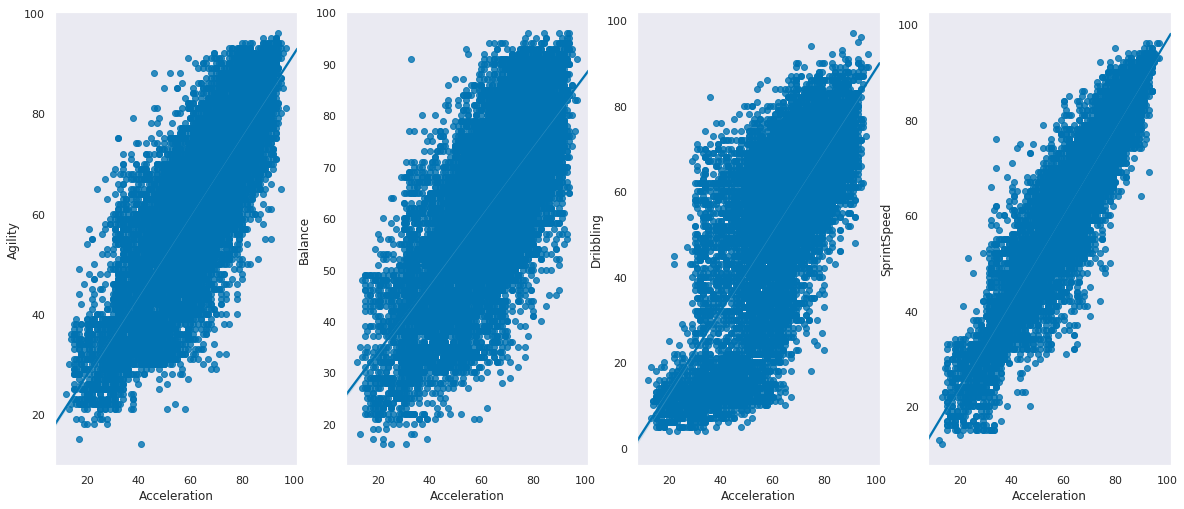

In [50]:
# Scater plot shows correlation between Acceleration and other chosen features
def make_scatter(df):
    feats = ('Agility', 'Balance', 'Dribbling', 'SprintSpeed')
    
    for index, feat in enumerate(feats):
        plt.subplot(len(feats)/4+1, 4, index+1)
        ax = sns.regplot(x = 'Acceleration', y = feat, data = df)

plt.figure(figsize = (20, 20))
plt.subplots_adjust(hspace = 0.4)

make_scatter(df)

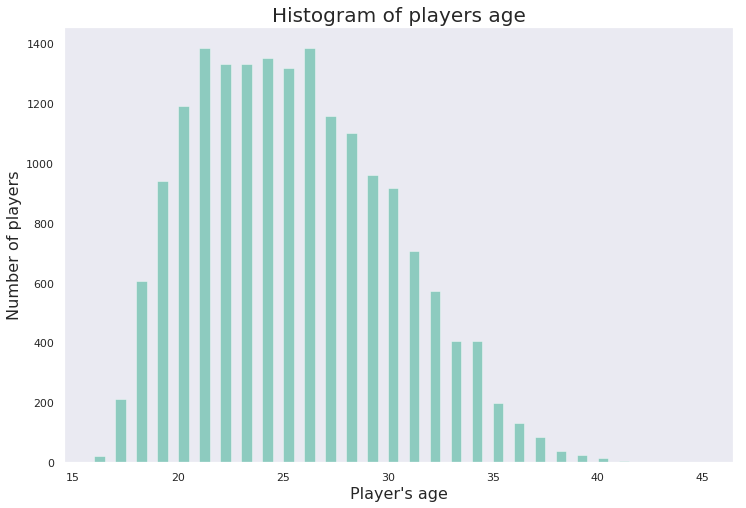

In [55]:
# Histogram: number of players's age
sns.set(style ="dark", palette="colorblind", color_codes=True)
x = df.Age
plt.figure(figsize=(12,8))
ax = sns.distplot(x, bins = 58, kde = False, color='g')
ax.set_xlabel(xlabel="Player\'s age", fontsize=16)
ax.set_ylabel(ylabel='Number of players', fontsize=16)
ax.set_title(label='Histogram of players age', fontsize=20)
plt.show()

In [16]:
# The five eldest players
eldest = df.sort_values('Age', ascending = False)[['Name', 'Nationality', 'Age']].head(3)
eldest.set_index('Name', inplace=True)
print(eldest)

            Nationality  Age
Name                        
O. Pérez         Mexico   45
S. Narazaki       Japan   42
J. Villar      Paraguay   41


In [17]:
# The five youngest players
eldest = df.sort_values('Age', ascending = True)[['Name', 'Nationality', 'Age']].head(22)
eldest.set_index('Name', inplace=True)
print(eldest)

                  Nationality  Age
Name                              
J. Olstad              Norway   16
J. Kitolano            Norway   16
C. Bassett      United States   16
A. Mahlonoko     South Africa   16
D. Adshead            England   16
Y. Roemer         Netherlands   16
Pelayo Morilla          Spain   16
E. Ceide               Norway   16
L. D'Arrigo         Australia   16
A. Doğan               Turkey   16
W. Geubbels            France   16
M. Köstenbauer        Austria   16
B. Mumba              England   16
K. Broda               Poland   16
H. Andersson           Sweden   16
J. Italiano         Australia   16
Y. Begraoui            France   16
R. Gómez            Argentina   16
B. Nygren              Sweden   16
F. Tauchhammer        Austria   16
A. Taoui               France   16
J. Lahne               Sweden   16


We see that the largest number of players are 21 or 26 yaers old.

On the plot above we see that is positive correlation between two variable.

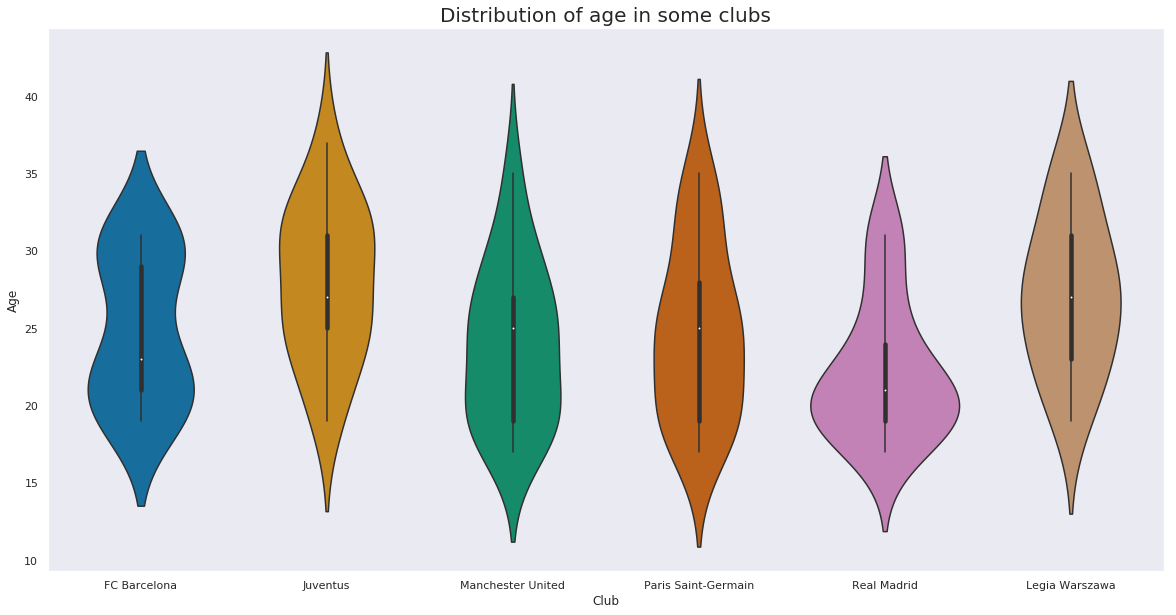

In [18]:
# Compare six clubs in relation to age
some_clubs = ('Juventus', 'Real Madrid', 'Paris Saint-Germain', 'FC Barcelona', 'Legia Warszawa', 'Manchester United')
df_club = df.loc[df['Club'].isin(some_clubs) & df['Age']]

fig, ax = plt.subplots()
fig.set_size_inches(20, 10)
ax = sns.violinplot(x="Club", y="Age", data=df_club);
ax.set_title(label='Distribution of age in some clubs', fontsize=20);

In [19]:
# The longest membership in the club
now = datetime.datetime.now()
df['Join_year'] = df.Joined.dropna().map(lambda x: x.split(',')[1].split(' ')[1])
df['Years_of_member'] = (df.Join_year.dropna().map(lambda x: now.year - int(x))).astype('int').dropna()
membership = df[['Name', 'Club', 'Years_of_member']].sort_values(by = 'Years_of_member', ascending = False).dropna().head()
membership.set_index('Name', inplace=True)
membership

,Club,Years_of_member
Name,,
B. Clarke,Charlton Athletic,20.0
P. Funk,VfR Aalen,20.0
Yang Jiawei,Jiangsu Suning FC,19.0
O. Bailey,Birmingham City,18.0
R. Mphahlele,Kaizer Chiefs,17.0


In [20]:
# The oldest team
df.groupby(['Club'])['Age'].sum().sort_values(ascending = False).head(5)

Club
Cardiff City      863
Villarreal CF     851
Frosinone         843
Chelsea           832
MKE Ankaragücü    829
Name: Age, dtype: int64

In [21]:
# The youngest team
df.groupby(['Club'])['Age'].sum().sort_values(ascending = True).head(5)

Club
Bray Wanderers    375
Limerick FC       404
Sligo Rovers      417
Derry City        440
Dalkurd FF        484
Name: Age, dtype: int64

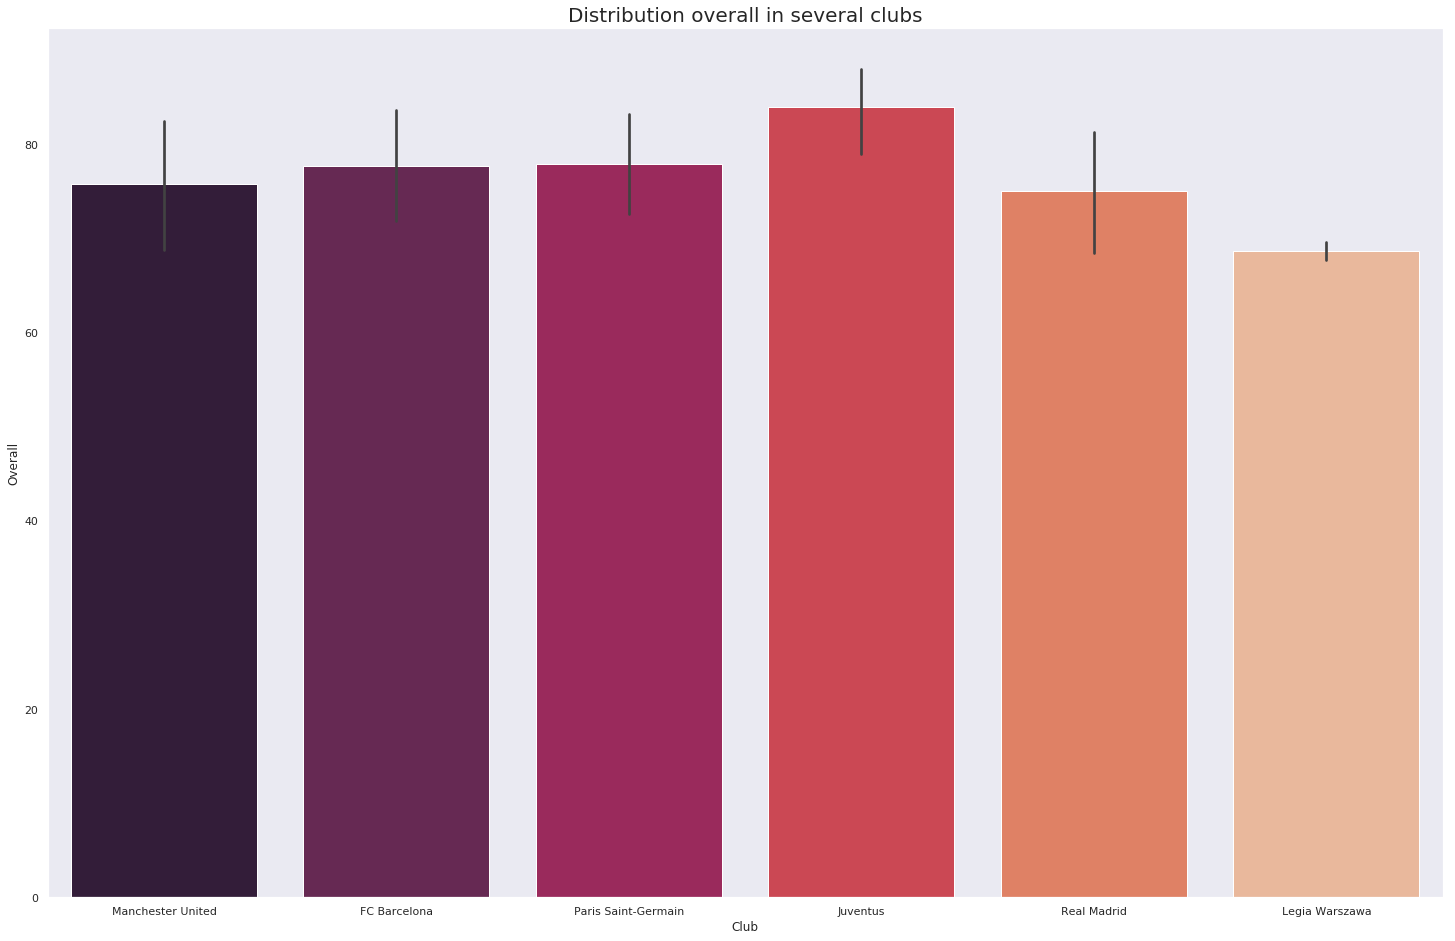

In [22]:
# The clubs and their players overalls
some_clubs = ('Juventus', 'Real Madrid', 'Paris Saint-Germain', 'FC Barcelona', 'Legia Warszawa', 'Manchester United')
df_club = df.loc[df['Club'].isin(some_clubs) & df['Age'] & df['Overall'] ]

ax = sns.barplot(x=df_club['Club'], y=df_club['Overall'], palette="rocket");
ax.set_title(label='Distribution overall in several clubs', fontsize=20);

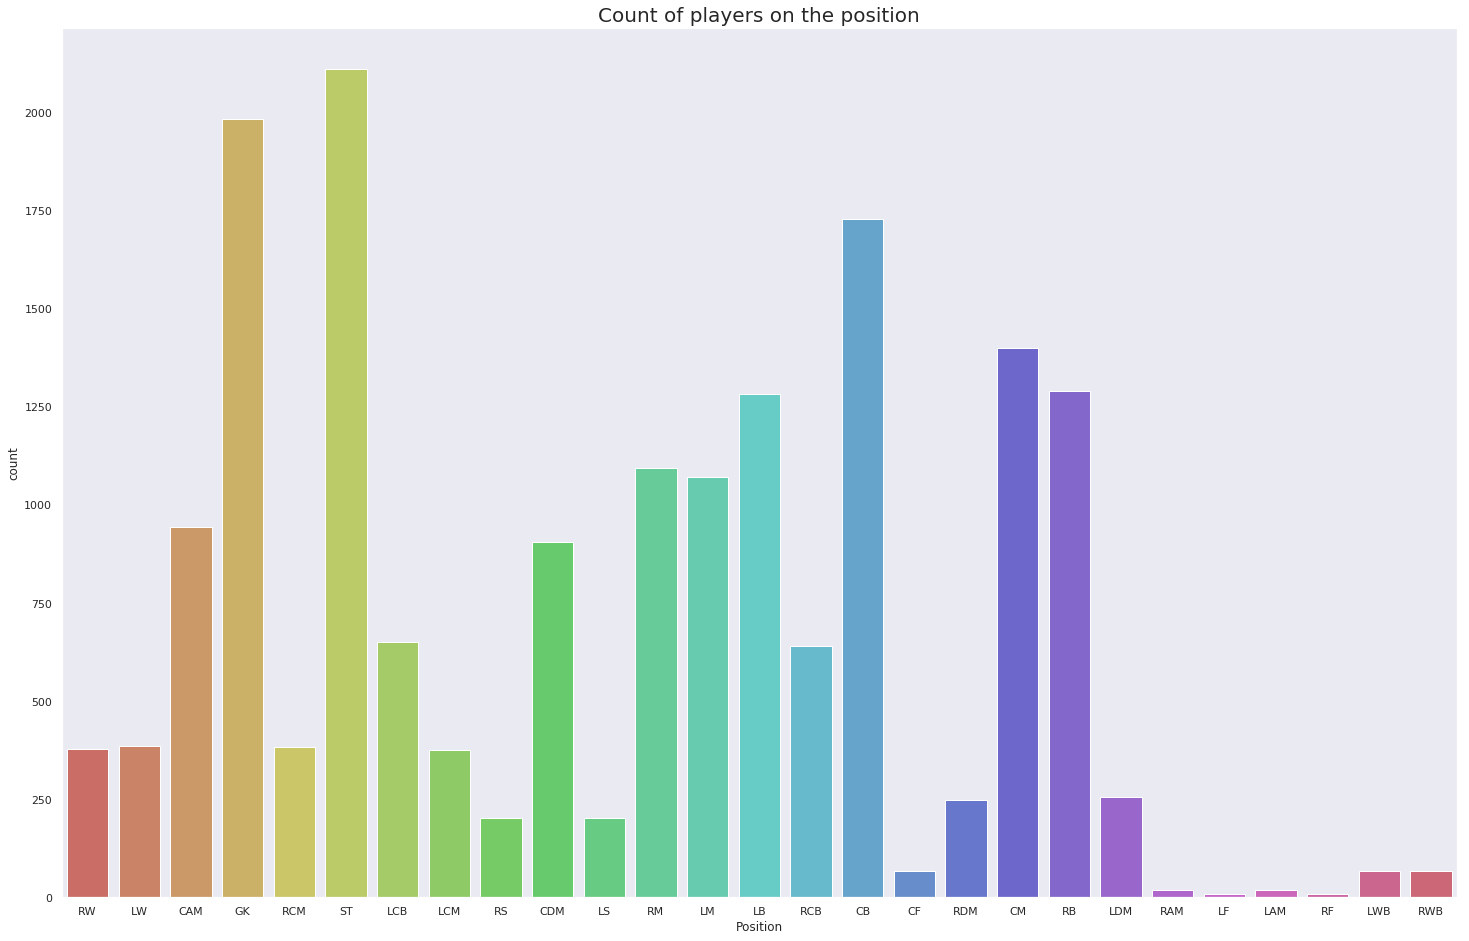

In [23]:
# All of position
ax = sns.countplot(x = 'Position', data = df, palette = 'hls');
ax.set_title(label='Count of players on the position', fontsize=20);

In [24]:
# The best player per position
display(HTML(df.iloc[df.groupby(df['Position'])['Overall'].idxmax()][['Name', 'Position']].to_html(index=False)))

Name,Position
Neymar Jr,CAM
S. Umtiti,CB
Sergio Busquets,CDM
Roberto Firmino,CF
T. Müller,CM
De Gea,GK
E. Dier,LAM
Marcelo,LB
Sergio Ramos,LCB
T. Kroos,LCM


In [25]:
player_features = (
    'Acceleration', 'Aggression', 'Agility', 
    'Balance', 'BallControl', 'Composure', 
    'Crossing', 'Dribbling', 'FKAccuracy', 
    'Finishing', 'GKDiving', 'GKHandling', 
    'GKKicking', 'GKPositioning', 'GKReflexes', 
    'HeadingAccuracy', 'Interceptions', 'Jumping', 
    'LongPassing', 'LongShots', 'Marking', 'Penalties'
)

# Top three features per position
for i, val in df.groupby(df['Position'])[player_features].mean().iterrows():
    print('Position {}: {}, {}, {}'.format(i, *tuple(val.nlargest(3).index)))

Position CAM: Balance, Agility, Acceleration
Position CB: Jumping, Aggression, HeadingAccuracy
Position CDM: Aggression, Jumping, Balance
Position CF: Agility, Balance, Acceleration
Position CM: Balance, Agility, Acceleration
Position GK: GKReflexes, GKDiving, GKPositioning
Position LAM: Agility, Balance, BallControl
Position LB: Acceleration, Balance, Agility
Position LCB: Jumping, Aggression, HeadingAccuracy
Position LCM: Balance, Agility, BallControl
Position LDM: BallControl, Aggression, LongPassing
Position LF: Agility, Balance, Acceleration
Position LM: Acceleration, Agility, Balance
Position LS: Acceleration, Jumping, Agility
Position LW: Acceleration, Agility, Balance
Position LWB: Acceleration, Agility, Balance
Position RAM: Agility, Balance, BallControl
Position RB: Acceleration, Balance, Jumping
Position RCB: Jumping, Aggression, HeadingAccuracy
Position RCM: Balance, Agility, BallControl
Position RDM: Aggression, Jumping, Balance
Position RF: Agility, Acceleration, Balance


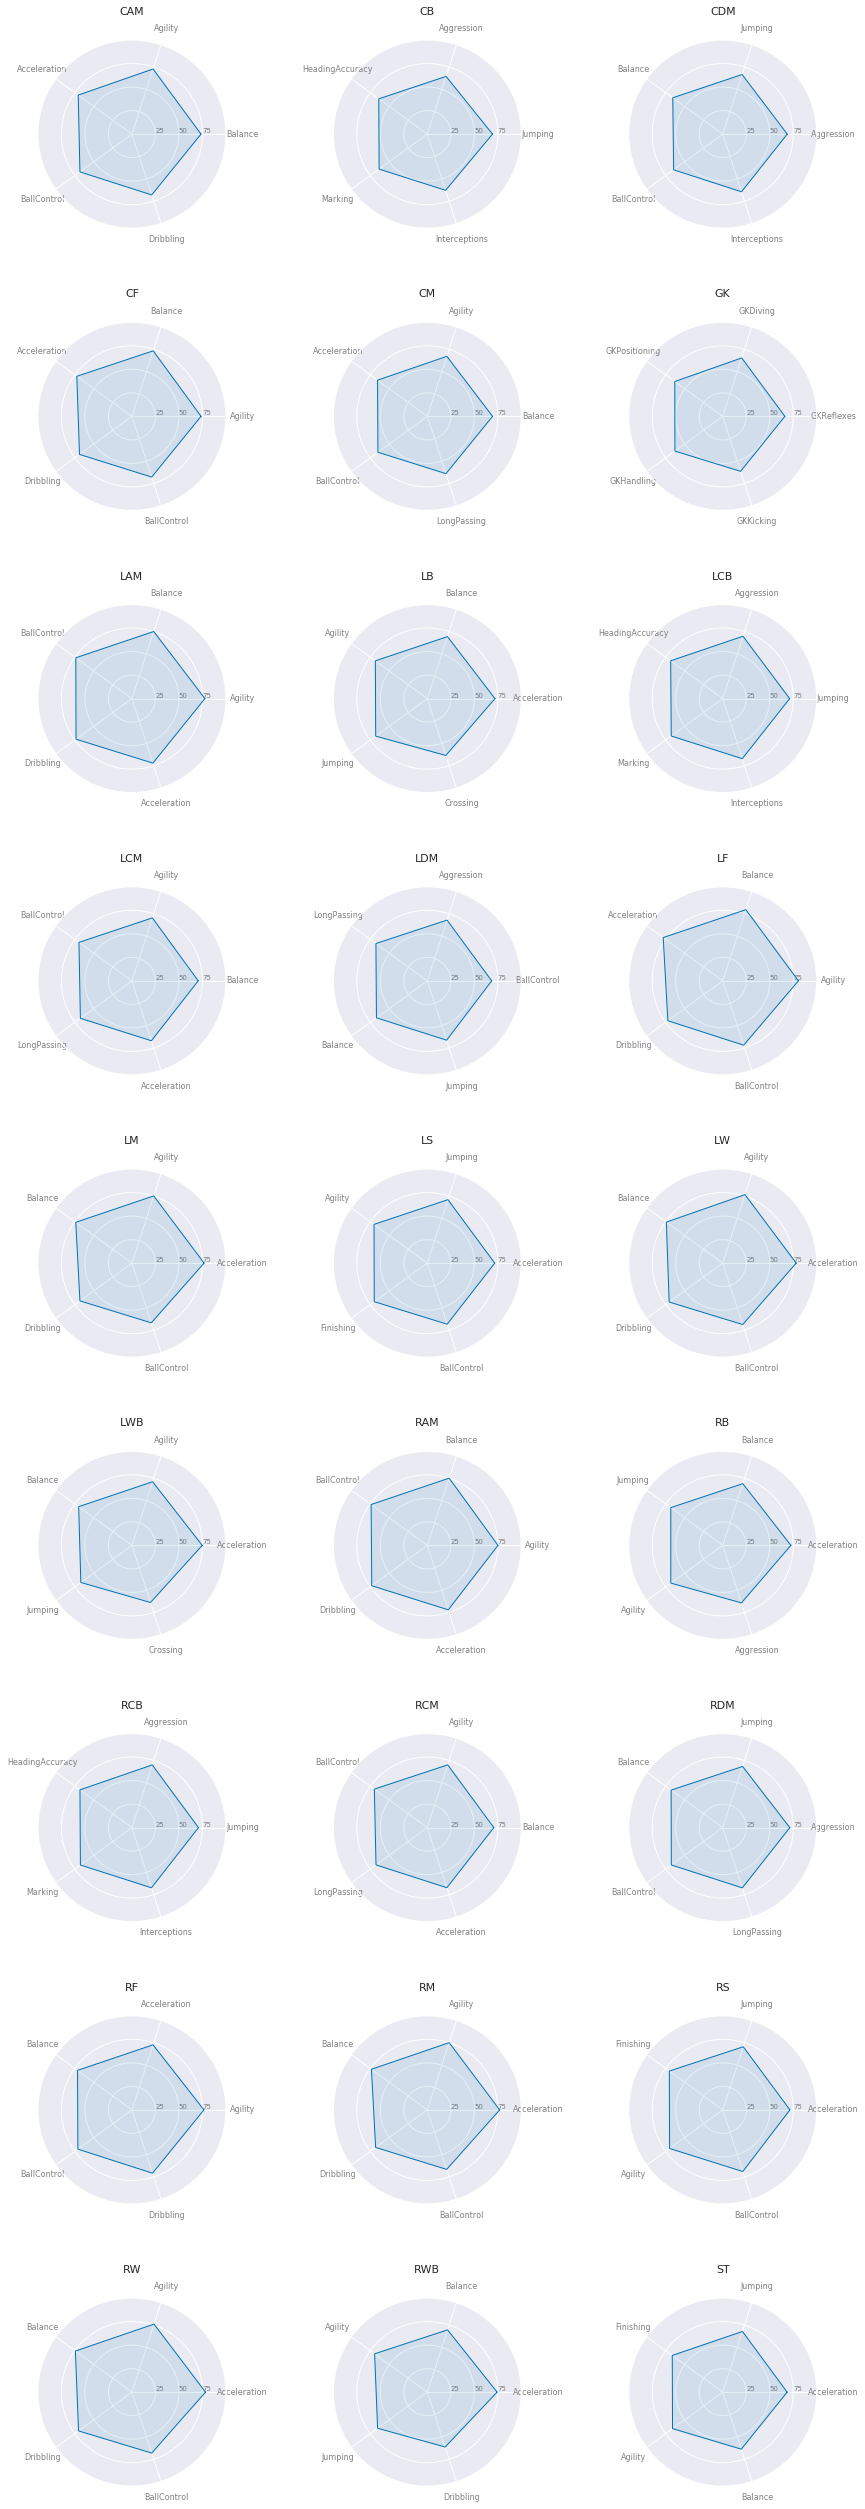

In [57]:
idx = 1
plt.figure(figsize=(15,45))
for position_name, features in df.groupby(df['Position'])[player_features].mean().iterrows():
    top_features = dict(features.nlargest(5))
    
    # number of variable
    categories=top_features.keys()
    N = len(categories)

    # We are going to plot the first line of the data frame.
    # But we need to repeat the first value to close the circular graph:
    values = list(top_features.values())
    values += values[:1]

    # What will be the angle of each axis in the plot? (we divide the plot / number of variable)
    angles = [n / float(N) * 2 * pi for n in range(N)]
    angles += angles[:1]

    # Initialise the spider plot
    ax = plt.subplot(9, 3, idx, polar=True)

    # Draw one axe per variable + add labels labels yet
    plt.xticks(angles[:-1], categories, color='grey', size=8)

    # Draw ylabels
    ax.set_rlabel_position(0)
    plt.yticks([25,50,75], ["25","50","75"], color="grey", size=7)
    plt.ylim(0,100)
    
    plt.subplots_adjust(hspace = 0.5)
    
    # Plot data
    ax.plot(angles, values, linewidth=1, linestyle='solid')

    # Fill area
    ax.fill(angles, values, 'b', alpha=0.1)
    
    plt.title(position_name, size=11, y=1.1)
    
    idx += 1 

In [27]:
# Top 5 left-footed players
df[df['Preferred Foot'] == 'Left'][['Name','Overall']].head()

,Name,Overall
0,L. Messi,94
10,T. Courtois,90
16,P. Dybala,89
18,A. Griezmann,89
23,David Silva,89


In [28]:
# Top 5 right-footed players
df[df['Preferred Foot'] == 'Right'][['Name','Overall']].head()

,Name,Overall
1,Cristiano Ronaldo,94
2,Neymar Jr,92
3,De Gea,91
4,K. De Bruyne,91
5,E. Hazard,91


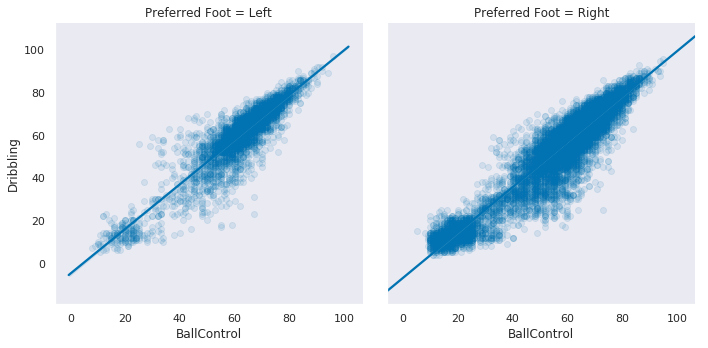

In [29]:
# Better is left-footed or rigth-footed players?
sns.lmplot(x = 'BallControl', y = 'Dribbling', data = df,
          scatter_kws = {'alpha':0.1},
          col = 'Preferred Foot');

In [30]:
# The clubs, where have players mainly from one country
clubs_coherency = pd.Series()
for club, players in df.groupby(['Club'])['Nationality'].count().items():
    coherency = df[df['Club'] == club].groupby(['Nationality'])['Club'].count().max() / players * 100
    clubs_coherency[club] = coherency

clubs_coherency.sort_values(ascending = False).head(23)

Padova                       100.000000
Vitória                      100.000000
Ceará Sporting Club          100.000000
Sport Club do Recife         100.000000
Bahia                        100.000000
Ranheim Fotball              100.000000
CA Osasuna                   100.000000
Atlético Paranaense          100.000000
Grêmio                       100.000000
Atlético Mineiro             100.000000
Guadalajara                  100.000000
Bray Wanderers               100.000000
Botafogo                     100.000000
Fluminense                   100.000000
América FC (Minas Gerais)    100.000000
Internacional                100.000000
Paraná                       100.000000
Cruzeiro                     100.000000
Santos                       100.000000
Cittadella                   100.000000
Sangju Sangmu FC             100.000000
Chapecoense                  100.000000
Athletic Club de Bilbao       96.969697
dtype: float64

In [31]:
# The clubs with largest number of different countries
df.groupby(['Club'])['Nationality'].nunique().sort_values(ascending = False).head()

Club
Brighton & Hove Albion    21
Fulham                    19
Udinese                   18
Napoli                    18
Empoli                    18
Name: Nationality, dtype: int64

In [32]:
# The clubs with the smallest number of foreigners players
df.groupby(['Club'])['Nationality'].nunique().sort_values().head()

Club
Atlético Paranaense    1
CA Osasuna             1
Bahia                  1
Guadalajara            1
Chapecoense            1
Name: Nationality, dtype: int64

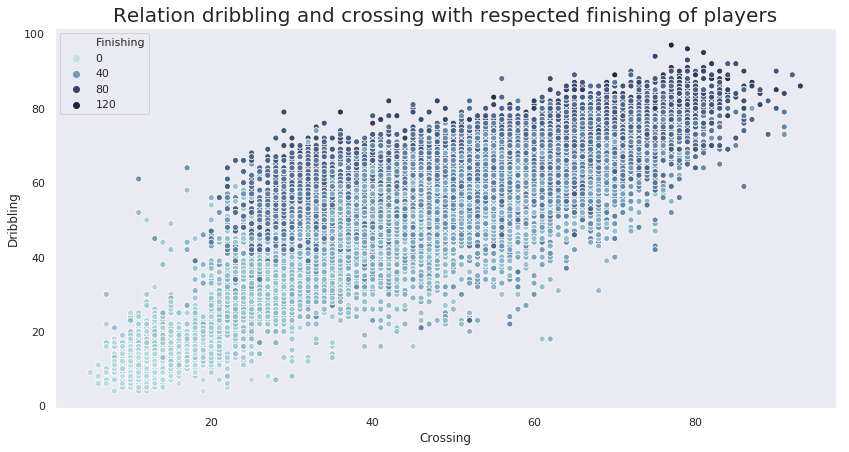

In [33]:
# Relation dribbling and crossing with respected finishing of players
plt.figure(figsize=(14,7))
cmap = sns.cubehelix_palette(rot=-.2, as_cmap=True)

ax = sns.scatterplot(x='Crossing', y='Dribbling',
                     hue='Finishing',
                     palette=cmap, sizes=(1, 1),
                     data=df)
ax.set_title(label='Relation dribbling and crossing with respected finishing of players', fontsize=20);

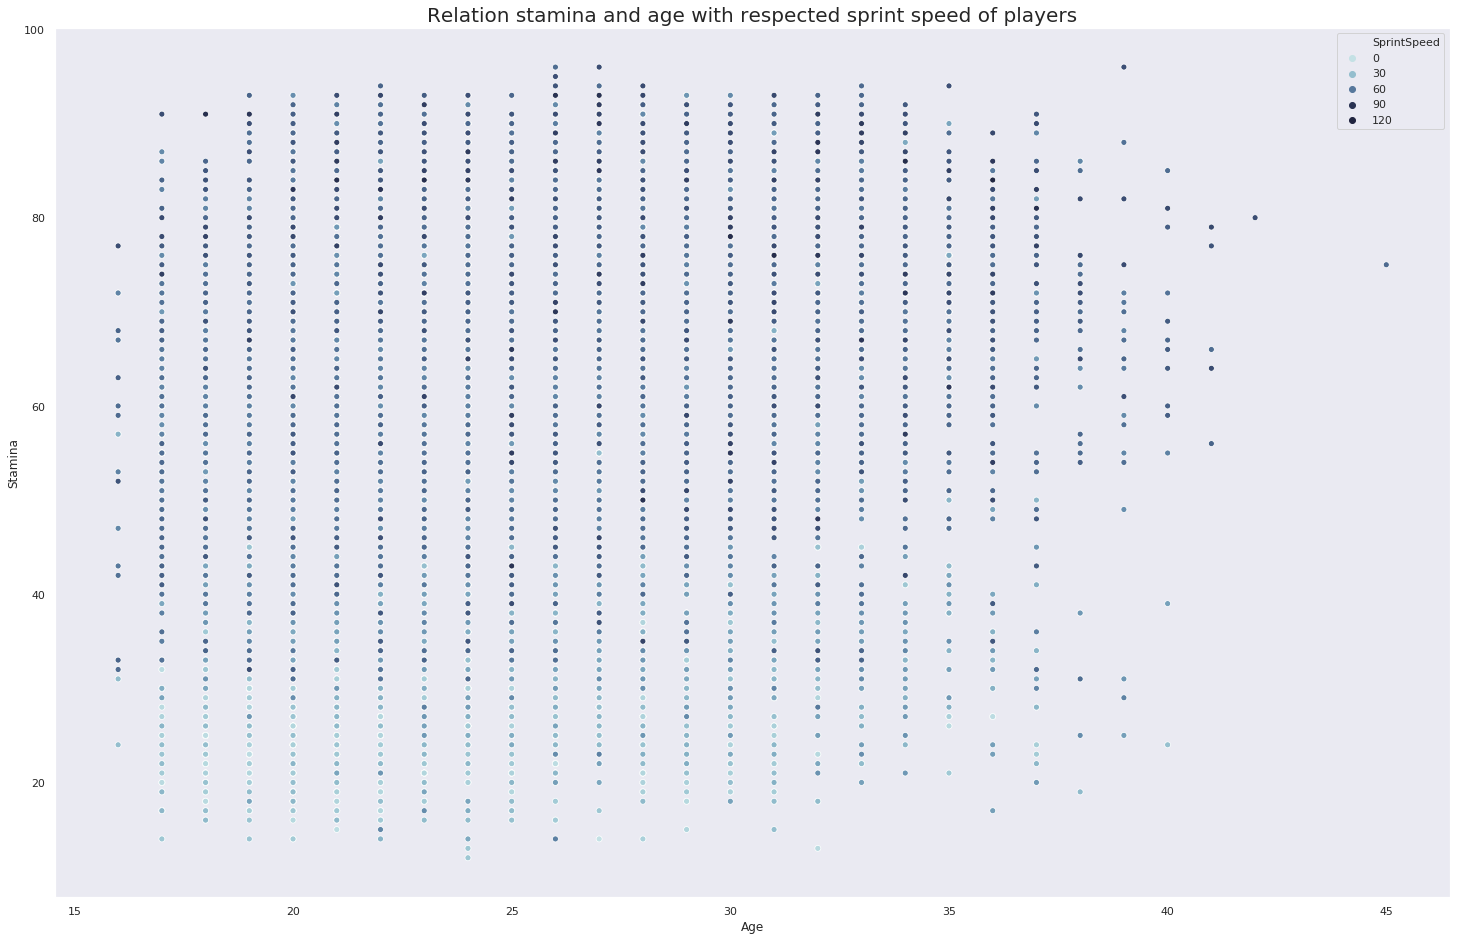

In [34]:
# Relation stamina and age with respected sprint speed of players
cmap = sns.cubehelix_palette(rot=-.2, as_cmap=True)

ax = sns.scatterplot(x='Age', y='Stamina',
                     hue='SprintSpeed',
                     palette=cmap, sizes=(1, 1),
                     data=df)
ax.set_title(label='Relation stamina and age with respected sprint speed of players', fontsize=20);

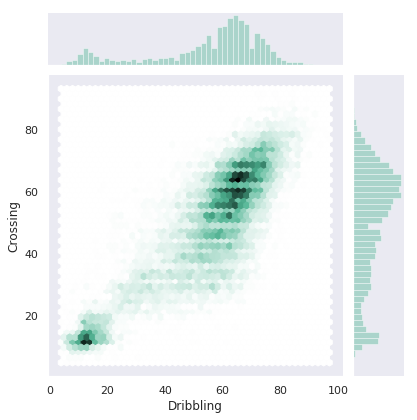

In [36]:
# Crossing vs. dribbling
sns.jointplot(x=df['Dribbling'], y=df['Crossing'], kind="hex", color="#4CB391");

In [35]:
# The value has some non numeric mark so I extract rigth value
def value_to_int(df_value):
    try:
        value = float(df_value[1:-1])
        suffix = df_value[-1:]

        if suffix == 'M':
            value = value * 1000000
        elif suffix == 'K':
            value = value * 1000
    except ValueError:
        value = 0
    return value

df['Value_float'] = df['Value'].apply(value_to_int)

In [37]:
# Top five the most expensive clubs
df.groupby(['Club'])['Value_float'].sum().sort_values(ascending = False).head(5)

Club
Real Madrid          871775000.0
FC Barcelona         844600000.0
Manchester City      753205000.0
FC Bayern München    702125000.0
Juventus             691475000.0
Name: Value_float, dtype: float64

In [38]:
# Top five the less expensive clubs
df.groupby(['Club'])['Value_float'].sum().sort_values().head(5)

Club
Bray Wanderers    1450000.0
Limerick FC       2200000.0
Sligo Rovers      3230000.0
Bohemian FC       3705000.0
Derry City        3710000.0
Name: Value_float, dtype: float64

In [39]:
# Top five teams with the best players
df.groupby(['Club'])['Overall'].max().sort_values(ascending = False).head()

Club
Juventus               94
FC Barcelona           94
Paris Saint-Germain    92
Manchester City        91
Manchester United      91
Name: Overall, dtype: int64

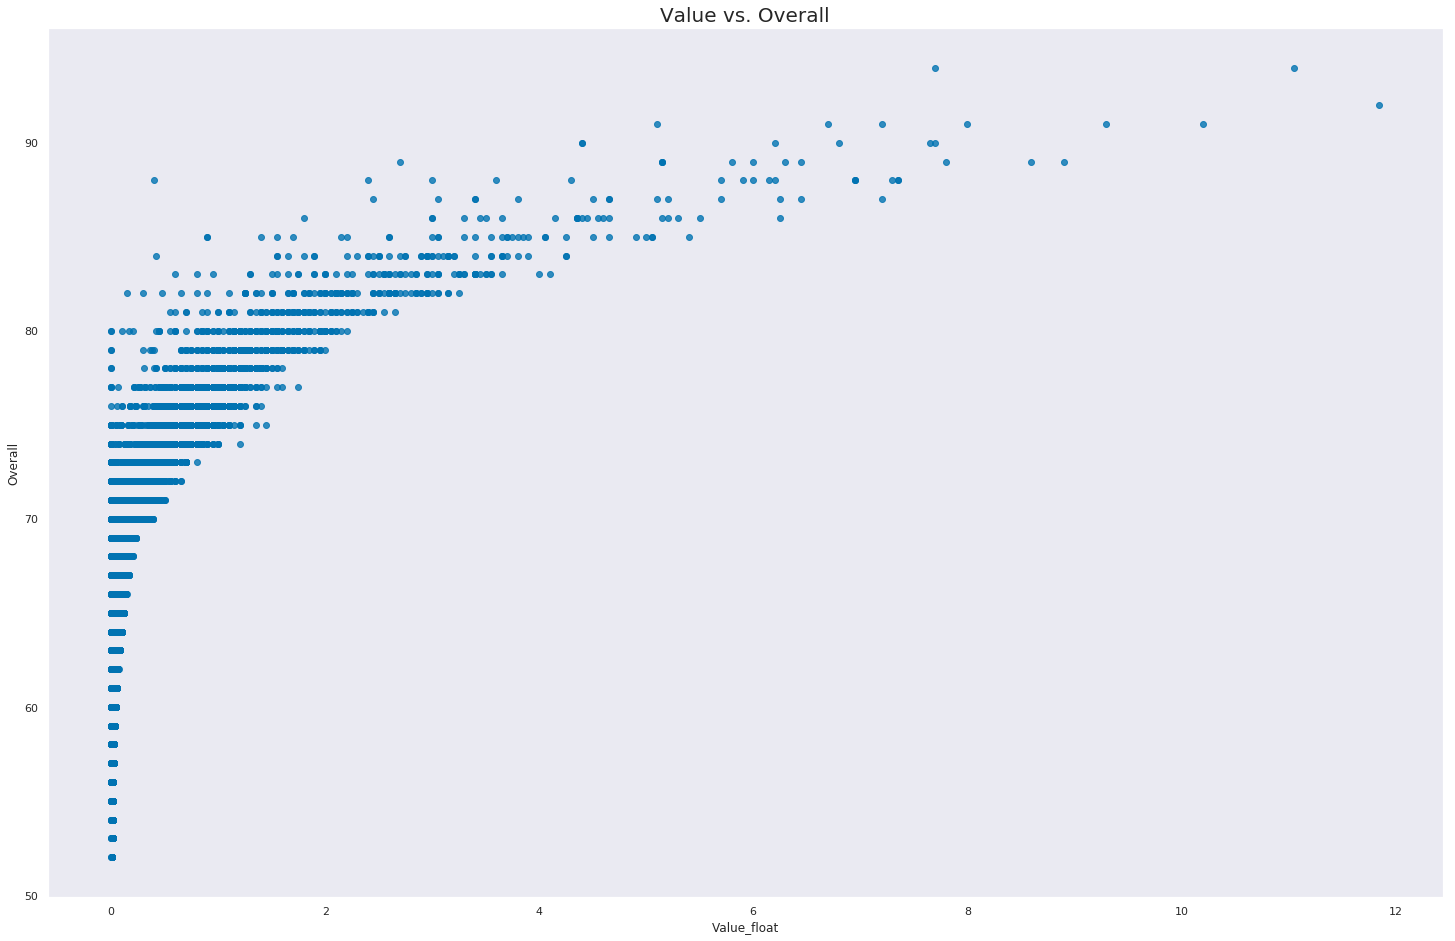

In [40]:
# Value vs. Overall
value = df.Value_float
ax = sns.regplot(x = value / 10000000, y = 'Overall', fit_reg = False, data = df);
ax.set_title(label='Value vs. Overall', fontsize=20);

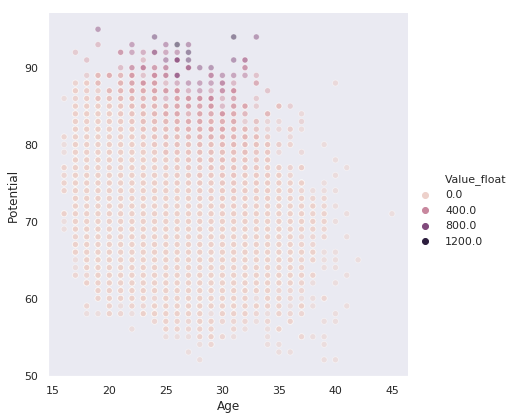

In [41]:
# Relation potential and age with respected value of players
cmap = sns.cubehelix_palette(rot=-.2, as_cmap=True)

sns.relplot(x="Age", y="Potential", hue=value/100000, 
            sizes=(40, 400), alpha=.5,
            height=6, data=df);

In [42]:
gdf = gpd.read_file('/home/daria/daria_science/github/fifa_19/map/ne_10m_admin_0_countries_lakes.shp')[['ADM0_A3', 'geometry']]

In [43]:
# I defined nationality_to_iso function, because pycountry don't have some of country names.

def nationality_to_iso(nationality):
    custom_isos = {
        'Bosnia Herzegovina':'BIH',
        'Wales': 'GBR',
        'Korea Republic': 'KOR',
        'Czech Republic': 'CZE',
        'Ivory Coast': 'CIV',
        'Scotland': 'GBR',
        'Central African Rep.': 'CAF',
        'DR Congo': 'COD',
        'Russia': 'RUS',
        'Venezuela': 'VEN', 
        'Republic of Ireland': 'IRL',
        'Cape Verde': 'CPV',
        'FYR Macedonia': 'MKD',
        'Syria': 'SYR',
        'Iran': 'INR',
        'China PR': 'CHN',
        'Guinea Bissau': 'GNB',
        'Kosovo': 'RKS',
        'Curacao': 'CUW',
        'Tanzania': 'TZA',
        'Moldova': 'MDA',
        'Northern Ireland': 'IRL',
        'Trinidad & Tobago': 'TTO',
        'Bolivia': 'BOL',
        'São Tomé & Príncipe': 'STP',
        'Korea DPR': 'PRK',
        'St Kitts Nevis': 'KNA',
        'Antigua & Barbuda': 'ATG',
        'Palestine': 'PSE',
        'St Lucia': 'LCA',
        'England': 'ENG'
    }
    try:
        return pycountry.countries.get(name=nationality).alpha_3
    except:
        pass
    try:
        return custom_isos[nationality]
    except:
        return nationality

In [44]:
df_fifa19['Nationality_ISO'] = df_fifa19['Nationality'].apply(nationality_to_iso)

In [45]:
nationality_count = df_fifa19.groupby('Nationality_ISO')['Nationality_ISO'].count().reset_index(name='Count')

In [46]:
merged = gdf.merge(nationality_count, left_on='ADM0_A3', right_on='Nationality_ISO')
merged.describe()

,Count
count,157.000000
mean,102.783439
std,206.996975
min,1.000000
25%,3.000000
50%,14.000000
75%,78.000000
max,1184.000000


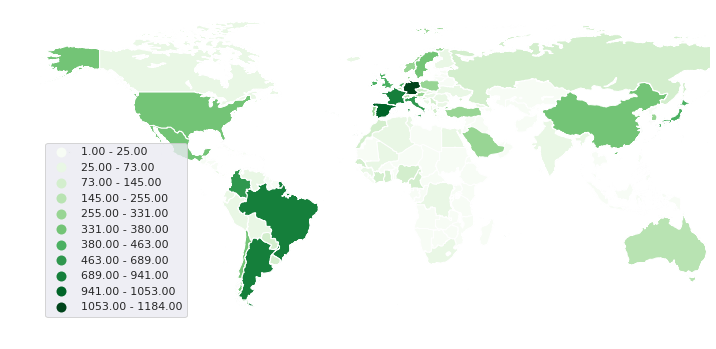

In [59]:
# Where players comes from?
ax = merged.plot(column='Count', cmap='Greens', figsize=(12, 10), legend=True, scheme='fisher_jenks', k=11, legend_kwds={'loc': 3})

ax.set_axis_off()
ax.set_xlim(-170, 155);